# Example with Healthcare Data 1

### Import Data Libraries

In [40]:
import pandas as pd

In [41]:
healthDf = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [42]:
healthDf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### EDA & Feature Engineering

In [43]:
healthDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [44]:
# Produce summary of Descriptive Statistics
healthDf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [45]:
# Remove id column
healthDf.drop('id', axis=1, inplace=True)
healthDf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
# Fix missing values for bmi
bmi_mean = healthDf['bmi'].mean()
healthDf['bmi'].fillna(bmi_mean, inplace=True)
healthDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [47]:
# Possible outliers for bmi
cond1 = healthDf['bmi'] >= 30
cond2 = healthDf['bmi'] <= 50
healthDf[cond1 & cond2].head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
15,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0


In [48]:
# Encode 'smoking_status
healthDf.groupby(['smoking_status', 'stroke']).size()

# .count() will reveal the count for all columns.
# So, if one column (or more) is missing values, then
# the .count() could reveal.
# healthDf.groupby('smoking_status').count()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
dtype: int64

In [49]:
# Frequency of strokes
healthDf.groupby('stroke').size()

stroke
0    4861
1     249
dtype: int64

<Figure size 432x288 with 0 Axes>

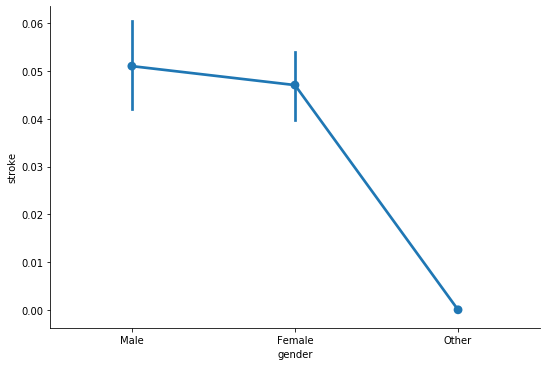

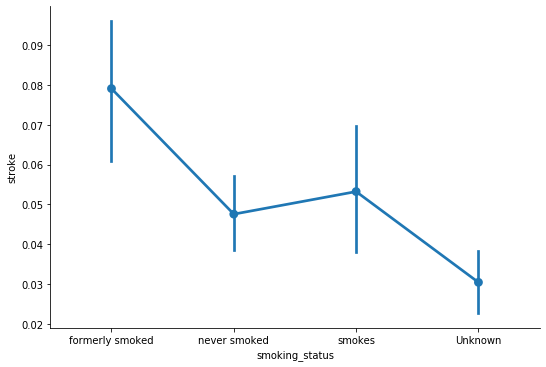

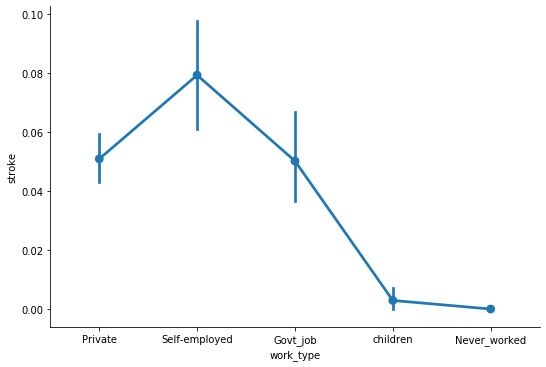

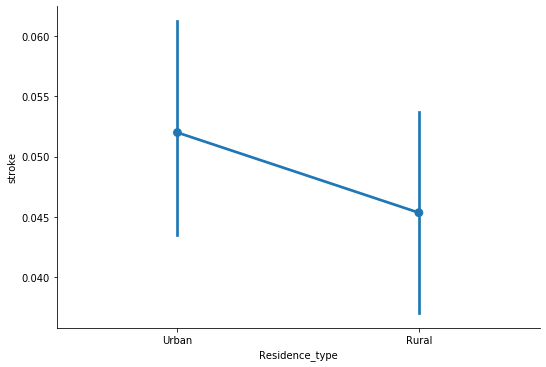

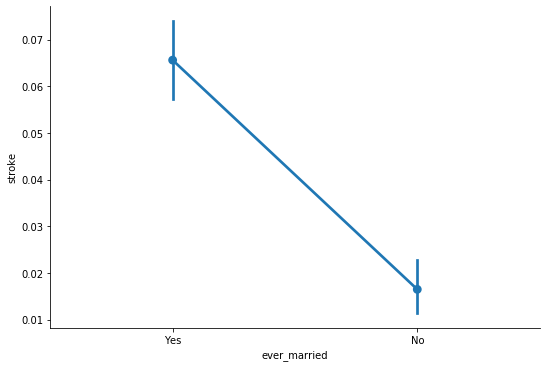

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Comparison of categorical features vs stroke
explanatoryFeats = ['gender', 'smoking_status', 'work_type', 'Residence_type', 'ever_married']

for index, feat in enumerate(explanatoryFeats):
    plt.figure(index)
    sns.catplot(x=feat, y='stroke', data=healthDf, kind='point', aspect=1.5)



In [51]:
# For determining relationship between two or more categorical variables,
# use the Chi-Squared test for Independence

Text(0, 0.5, 'Frequency')

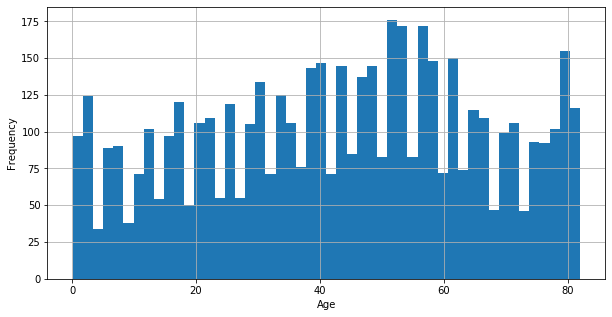

In [52]:
# Frequency Distribution of age brackets
healthDf['age'].hist(bins=50, figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Frequency')

In [53]:
cond1 = healthDf['age'] <= 18
cond2 = healthDf['heart_disease'] == 1
healthDf[cond1 & cond2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3031 to 3031
Data columns (total 11 columns):
gender               1 non-null object
age                  1 non-null float64
hypertension         1 non-null int64
heart_disease        1 non-null int64
ever_married         1 non-null object
work_type            1 non-null object
Residence_type       1 non-null object
avg_glucose_level    1 non-null float64
bmi                  1 non-null float64
smoking_status       1 non-null object
stroke               1 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 96.0+ bytes


In [54]:
healthDf_stroke = healthDf[ healthDf['stroke'] == 1]
healthDf_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,67.728193,0.265060,0.188755,132.544739,30.217789,1.0
std,12.727419,0.442254,0.392102,61.921056,5.825589,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,71.000000,0.000000,0.000000,105.220000,28.893237,1.0
75%,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Text(0, 0.5, 'Frequency')

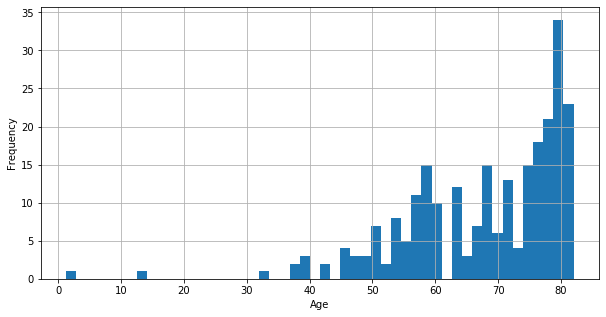

In [55]:
healthDf_stroke['age'].hist(bins=50, figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Frequency')

In [56]:
# Some important features for determing stroke:
# Age
# BMI
# Heart Disease
# Employment Type

In [57]:
# Map categorical and ordinal feature to numbers
ever_married_dict = {
    'No': 0,
    'Yes': 1
}

# healthDf['ever_married'].apply( lambda param: ever_married_dict[param] )
healthDf['ever_married'] = healthDf['ever_married'].map(ever_married_dict)

In [58]:
healthDf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [59]:
# Apply one-hot encoding to categorical nominal features
healthDf = pd.get_dummies(healthDf, columns=['work_type','smoking_status','Residence_type','gender'])

In [60]:
healthDf.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,228.69,36.600000,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,61.0,0,0,1,202.21,28.893237,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,80.0,0,1,1,105.92,32.500000,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,79.0,1,0,1,174.12,24.000000,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [61]:
healthDf.groupby('stroke').size()

stroke
0    4861
1     249
dtype: int64

In [62]:
# Undersample (reduce the number of entries where stroke = 0)


healthDf_nostroke = healthDf[ healthDf['stroke'] == 0 ]
healthDf_nostroke = healthDf_nostroke.sample(frac=1)[0:300]
healthDf_nostroke.info()

healthDf_stroke = healthDf[ healthDf['stroke'] == 1 ]

healthDf_halved = pd.concat([healthDf_nostroke, healthDf_stroke])



featuresDf = healthDf_halved.drop('stroke', axis=1)
labelDf = healthDf_halved['stroke']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1941 to 4373
Data columns (total 21 columns):
age                               300 non-null float64
hypertension                      300 non-null int64
heart_disease                     300 non-null int64
ever_married                      300 non-null int64
avg_glucose_level                 300 non-null float64
bmi                               300 non-null float64
stroke                            300 non-null int64
work_type_Govt_job                300 non-null uint8
work_type_Never_worked            300 non-null uint8
work_type_Private                 300 non-null uint8
work_type_Self-employed           300 non-null uint8
work_type_children                300 non-null uint8
smoking_status_Unknown            300 non-null uint8
smoking_status_formerly smoked    300 non-null uint8
smoking_status_never smoked       300 non-null uint8
smoking_status_smokes             300 non-null uint8
Residence_type_Rural              300

In [63]:
healthDf_halved.groupby('stroke').size()

stroke
0    300
1    249
dtype: int64

### Machine Learning

In [67]:
# Sklearn will provides methods for (1) Machine Learning, (2) Hyperparameter Tuning, and (3) Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Produce the train/validation/test data sets
# Using the split 60/20/20
trainF, testF, trainL, testL = train_test_split(featuresDf, labelDf, test_size=0.4, random_state=22)

testF, valF, testL, valL = train_test_split(testF, testL, test_size=0.5, random_state=22)

In [ ]:
# The Basline Model
model = RandomForestClassifier(random_state=100)

# Learn parameters with train
model.fit(trainF, trainL)

# Update parameters with val
predictedL = model.predict(valF)
accuracy_val = round(accuracy_score(valL, predictedL), 3)
precision_val = round(precision_score(valL, predictedL), 3)
recall_val = round(recall_score(valL, predictedL), 3)

print("Metrics for Validation")
print(f"Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}")

Metrics for Validation
Accuracy: 0.645, Precision: 0.644, Recall: 0.558


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
confusion_matrix(valL, predictedL)
# TN FN
# FP TP

array([[42, 16],
       [23, 29]])

In [ ]:
# Update parameters with test 
predictedL = model.predict(testF)
accuracy_test = round(accuracy_score(testL, predictedL), 3)
precision_test = round(precision_score(testL, predictedL), 3)
recall_test = round(recall_score(testL, predictedL), 3)

print("Metrics for Test")
print(f"Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}")

# Validation: 
# Accuracy: 0.645, Precision: 0.644, Recall: 0.558
# 
# Test: 
# Accuracy: 0.782, Precision: 0.821, Recall: 0.653

Metrics for Test
Accuracy: 0.782, Precision: 0.821, Recall: 0.653


In [ ]:
# Produce the train/validation/test data sets
# Using the split 60/20/20
trainF, testF, trainL, testL = train_test_split(featuresDf_halved, labelDf, test_size=0.4, random_state=22)

testF, valF, testL, valL = train_test_split(testF, testL, test_size=0.5, random_state=22)

#### Baseline Model

In [ ]:
# The Basline Model
model = RandomForestClassifier(random_state=100)

# Learn parameters with train
model.fit(trainF, trainL)

# Update parameters with val
predictedL = model.predict(valF)
accuracy_val = round(accuracy_score(valL, predictedL), 3)
precision_val = round(precision_score(valL, predictedL), 3)
recall_val = round(recall_score(valL, predictedL), 3)

print("Metrics for Validation")
print(f"Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}")

In [ ]:
confusion_matrix(valL, predictedL)
# TN FN
# FP TP

In [74]:
# Update parameters with test 
predictedL = model.predict(testF)
accuracy_test = round(accuracy_score(testL, predictedL), 3)
precision_test = round(precision_score(testL, predictedL), 3)
recall_test = round(recall_score(testL, predictedL), 3)

print("Metrics for Test")
print(f"Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}")

# Accuracy: 0.945, Precision: 0.5, Recall: 0.036

Metrics for Test
Accuracy: 0.782, Precision: 0.821, Recall: 0.653


<BarContainer object of 20 artists>

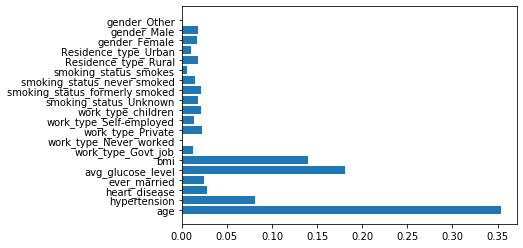

In [ ]:
plt.barh(featuresDf.columns, model.feature_importances_)

#### Improved

In [66]:
# This function is for nicely formatting and printing
# the results of GridSearchCV
def printResults(gridSearchResults):

    print(f"The Top Models: {gridSearchResults.best_params_}\n")

    means = gridSearchResults.cv_results_['mean_test_score']
    stnDvs = gridSearchResults.cv_results_['std_test_score']
    hyperparams =  gridSearchResults.cv_results_['params']

    for mean, stnDv, hyperparam in zip(means, stnDvs, hyperparams):
        print(
            "{} (+/-{}) for {}".format(
                round(mean,3), 
                round(stnDv, 3),
                hyperparam
            )
        )

In [69]:
# Note: by default, RandomForestClassifier uses n_estimators (decision trees) =100
rfModel = RandomForestClassifier()

# The hyperparameter combination to try (e.g, 5 trees and 20 for max depth)
hyperparameters_dict = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None],
}

# GridSearchCV will fit the model using different hyperparameters
# and record their scores.
gridSearch = GridSearchCV( rfModel, hyperparameters_dict, cv=5 )

gridSearch.fit( trainF, trainL )
printResults(gridSearch)

The Top Models: {'max_depth': 20, 'n_estimators': 100}

0.736 (+/-0.056) for {'max_depth': 2, 'n_estimators': 5}
0.766 (+/-0.064) for {'max_depth': 2, 'n_estimators': 50}
0.778 (+/-0.049) for {'max_depth': 2, 'n_estimators': 100}
0.717 (+/-0.039) for {'max_depth': 10, 'n_estimators': 5}
0.772 (+/-0.056) for {'max_depth': 10, 'n_estimators': 50}
0.781 (+/-0.05) for {'max_depth': 10, 'n_estimators': 100}
0.72 (+/-0.065) for {'max_depth': 20, 'n_estimators': 5}
0.784 (+/-0.067) for {'max_depth': 20, 'n_estimators': 50}
0.799 (+/-0.045) for {'max_depth': 20, 'n_estimators': 100}
0.742 (+/-0.051) for {'max_depth': None, 'n_estimators': 5}
0.763 (+/-0.076) for {'max_depth': None, 'n_estimators': 50}
0.79 (+/-0.053) for {'max_depth': None, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# The top 3 models (in order of ranking)
# 0.799 (+/-0.045) for {'max_depth': 20, 'n_estimators': 100}
# 0.79 (+/-0.053) for {'max_depth': None, 'n_estimators': 100}
# 0.784 (+/-0.067) for {'max_depth': 20, 'n_estimators': 50}

In [70]:
rfModel1 = RandomForestClassifier(n_estimators=100, max_depth=20)
rfModel1.fit(trainF, trainL)

rfModel2 = RandomForestClassifier(n_estimators=100, max_depth=None)
rfModel2.fit(trainF, trainL)

rfModel3 = RandomForestClassifier(n_estimators=50, max_depth=20)
rfModel3.fit(trainF, trainL)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
for i, rfModel_i in enumerate([rfModel1, rfModel2, rfModel3]):

    predictedL_i = rfModel_i.predict(valF)

    accuracy_val_i = round(accuracy_score(valL, predictedL_i), 3)
    precision_val_i = round(precision_score(valL, predictedL_i), 3)
    recall_val_i = round(recall_score(valL, predictedL_i), 3)

    print(f"Metrics for Validation for Model {i+1}")
    print(f"Accuracy: {accuracy_val_i}, Precision: {precision_val_i}, Recall: {recall_val_i}")

Metrics for Validation for Model 1
Accuracy: 0.755, Precision: 0.727, Recall: 0.769
Metrics for Validation for Model 2
Accuracy: 0.745, Precision: 0.722, Recall: 0.75
Metrics for Validation for Model 3
Accuracy: 0.727, Precision: 0.72, Recall: 0.692


In [73]:
predictedL = rfModel1.predict(testF)
accuracy_test = round(accuracy_score(testL, predictedL), 3)
precision_test = round(precision_score(testL, predictedL), 3)
recall_test = round(recall_score(testL, predictedL), 3)

print("Metrics for Test")
print(f"Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}")


Metrics for Test
Accuracy: 0.8, Precision: 0.787, Recall: 0.755


### Predicting for New Patients

Male,71,0,0,Yes,Private,Urban,198.21,27.3,formerly smoked,0
Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1

In [120]:
new_patient_data = {
    'age': [35, 35],
    'hypertension': [0,0],
    'heart_disease': [0,0],
    'ever_married': [1,0],
    'avg_glucose_level': [180.2, 92.1],
    'bmi': [30.2, 50],
    'work_type_Govt_job': [0,0],
    'work_type_Never_worked': [0,0],
    'work_type_Private': [1,0],
    'work_type_Self-employed': [0,1],
    'work_type_children': [0,0],
    'smoking_status_Unknown': [0,0],
    'smoking_status_formerly smoked': [0,0],
    'smoking_status_never smoked': [0,0],
    'smoking_status_smokes': [0,0],
    'Residence_type_Rural': [0,0],
    'Residence_type_Urban': [0,0],
    'gender_Female': [0,1],
    'gender_Male': [1,0],
    'gender_Other': [0,0]
}

newPatients = pd.DataFrame(new_patient_data)

In [121]:
newPatients['ever_married']

0    1
1    0
Name: ever_married, dtype: int64

In [122]:
# Predict 'stroke' for these patients
new_prediction = rfModel1.predict(newPatients)

In [123]:
newPatients['stroke'] = new_prediction
newPatients.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other,stroke
0,35,0,0,1,180.2,30.2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,35,0,0,0,92.1,50.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
